In [1]:
import pandas as pd
import io
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
file1 = '/home/jovyan/Data/pd3/pd_mx_2019_agg3_3h.csv'
df1 = pd.read_csv(file1)
df1.columns = ['geohash_3', 'no_of_points', 'no_of_unique_users', 'local_time', 'local_date']
df1 = df1[df1['local_date'].apply(lambda x: str(x).isdigit())]
df1['local_date'] = df1['local_date'].astype(int)
combined_df=df1
df1

,geohash_3,no_of_points,no_of_unique_users,local_time,local_date
0,9em,10820,772,20190101 00:00:00 - 03:00:00,20190101
1,9en,77,11,20190101 00:00:00 - 03:00:00,20190101
2,9ep,8147,638,20190101 00:00:00 - 03:00:00,20190101
3,9eq,12307,1235,20190101 00:00:00 - 03:00:00,20190101
4,9er,15680,1718,20190101 00:00:00 - 03:00:00,20190101
...,...,...,...,...,...
162268,d59,8188,529,20190630 21:00:00 - 24:00:00,20190630
162269,d5b,1856,187,20190630 21:00:00 - 24:00:00,20190630
162270,d5c,931,86,20190630 21:00:00 - 24:00:00,20190630
162271,d5d,31714,2159,20190630 21:00:00 - 24:00:00,20190630


In [14]:
file2 = '/home/jovyan/Data/pd3/pd_in2_2019_agg3_3h.csv'
df2 = pd.read_csv(file2)
# df1.columns = ['geohash_3', 'no_of_points', 'no_of_unique_users', 'local_date']
df2 = df2[df2['local_date'].apply(lambda x: str(x).isdigit())]
df2['local_date'] = df2['local_date'].astype(int)
df2

,geohash_3,no_of_points,no_of_unique_users,local_time,local_date
0,t9q,676,134,20190101 00:00:00 - 03:00:00,20190101
1,t9r,450,93,20190101 00:00:00 - 03:00:00,20190101
2,t9v,609,136,20190101 00:00:00 - 03:00:00,20190101
3,t9w,7516,1346,20190101 00:00:00 - 03:00:00,20190101
4,t9x,2027,369,20190101 00:00:00 - 03:00:00,20190101
...,...,...,...,...,...
241997,whd,6597,646,20190630 21:00:00 - 24:00:00,20190630
241998,whe,975,123,20190630 21:00:00 - 24:00:00,20190630
241999,whf,3701,270,20190630 21:00:00 - 24:00:00,20190630
242000,whg,7436,798,20190630 21:00:00 - 24:00:00,20190630


In [15]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,geohash_3,no_of_points,no_of_unique_users,local_time,local_date
0,t9q,833,158,20190701 00:00:00 - 03:00:00,20190701
1,t9r,718,133,20190701 00:00:00 - 03:00:00,20190701
2,t9v,1353,220,20190701 00:00:00 - 03:00:00,20190701
3,t9w,12186,1902,20190701 00:00:00 - 03:00:00,20190701
4,t9x,2904,441,20190701 00:00:00 - 03:00:00,20190701
...,...,...,...,...,...
498260,whd,6597,646,20190630 21:00:00 - 24:00:00,20190630
498261,whe,975,123,20190630 21:00:00 - 24:00:00,20190630
498262,whf,3701,270,20190630 21:00:00 - 24:00:00,20190630
498263,whg,7436,798,20190630 21:00:00 - 24:00:00,20190630


In [3]:
# Parse the original datetime string and adjust the time
df1['local_time'] = pd.to_datetime(df1['local_time'], format='%Y%m%d %H:%M:%S')
df1['local_time'] = df1['local_time'].dt.strftime('%Y%m%d %H:%M:%S') + ' - ' + (df1['local_time'] + pd.Timedelta(hours=3)).dt.strftime('%H:%M:%S')

df1

ValueError: time data "20190701 00:00:00 - 03:00:00" at position 0 doesn't match format specified

In [20]:
# import os
# import pandas as pd

# # Specify the folder containing the files
# folder_path = '/home/jovyan/Data/Fixing'

# # Get a list of all files in the folder
# file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# # Initialize an empty DataFrame
# combined_df = pd.DataFrame()

# # Define the new column names
# new_columns = ['geohash_3', 'no_of_points', 'no_of_unique_users', 'local_date']

# # Loop through all files and append their content to the combined DataFrame
# for file in file_list:
#     file_path = os.path.join(folder_path, file)
#     df = pd.read_csv(file_path)
#     df.columns = new_columns  # Rename columns
#     combined_df = pd.concat([combined_df, df], ignore_index=True)

# combined_df

,geohash_3,no_of_points,no_of_unique_users,local_date
0,tgt,162348,2925,20190522
1,tgv,62093,985,20190522
2,tuj,189563,3555,20190522
3,tum,60512,1328,20190522
4,tut,103758,1879,20190522
...,...,...,...,...
1970,whe,10293,246,20190527
1971,whf,18868,444,20190527
1972,whg,60898,1412,20190527
1973,whu,8681,235,20190527


# Check duplicates

In [3]:
combined_df['geohash_3'] = combined_df['geohash_3'].astype(str)
# combined_df['geohash_5'] = combined_df['geohash_5'].astype(str)

combined_df['no_of_points'] = combined_df['no_of_points'].astype(int)
combined_df['no_of_unique_users'] = combined_df['no_of_unique_users'].astype(int)
combined_df['local_time'] = combined_df['local_time'].astype(str)
combined_df['local_date'] = combined_df['local_date'].astype(int)

combined_df = combined_df.drop_duplicates()
combined_df

,geohash_3,no_of_points,no_of_unique_users,local_time,local_date
0,9em,10820,772,20190101 00:00:00 - 03:00:00,20190101
1,9en,77,11,20190101 00:00:00 - 03:00:00,20190101
2,9ep,8147,638,20190101 00:00:00 - 03:00:00,20190101
3,9eq,12307,1235,20190101 00:00:00 - 03:00:00,20190101
4,9er,15680,1718,20190101 00:00:00 - 03:00:00,20190101
...,...,...,...,...,...
162268,d59,8188,529,20190630 21:00:00 - 24:00:00,20190630
162269,d5b,1856,187,20190630 21:00:00 - 24:00:00,20190630
162270,d5c,931,86,20190630 21:00:00 - 24:00:00,20190630
162271,d5d,31714,2159,20190630 21:00:00 - 24:00:00,20190630


# Check missing dates

In [5]:
unique_values_count = combined_df["local_date"].unique()
all_dates = pd.date_range(start='2019-01-01', end='2019-06-30').strftime('%Y%m%d').astype(int)
all_dates = np.array(all_dates)
missing_dates = np.setdiff1d(all_dates, unique_values_count)

missing_dates

array([20190322, 20190323, 20190324, 20190325, 20190326, 20190327,
       20190328, 20190329, 20190330, 20190331])

# Check for hours per day (for 3h)

In [22]:
# Convert local_date to datetime objects
combined_df['local_date'] = pd.to_datetime(combined_df['local_date'], format='%Y%m%d')

# Function to parse the local_time column and extract the start hour
def parse_start_hour(time_str):
    try:
        start_time_str, _ = time_str.split(' - ')
        start_time = datetime.strptime(start_time_str, '%Y%m%d %H:%M:%S')
        return start_time.hour
    except ValueError:
        return None

combined_df['start_hour'] = combined_df['local_time'].map(parse_start_hour)

# Required hours to check
required_hours = set([0, 3, 6, 9, 12, 15, 18, 21])

# Group by local_date and check missing hours
missing_hours = {}

for date, group in combined_df.groupby('local_date'):
    present_hours = set(group['start_hour'])
    missing = required_hours - present_hours
    if missing:
        missing_hours[date] = sorted(list(missing))

# Convert missing hours dictionary to DataFrame for better readability
missing_hours_df = pd.DataFrame(list(missing_hours.items()), columns=['Date', 'Missing Hours'])

# Display the missing hours
print("Missing hours for each date:")
print(missing_hours_df)


/tmp/ipykernel_280/1032260670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['local_date'] = pd.to_datetime(combined_df['local_date'], format='%Y%m%d')


Missing hours for each date:
Empty DataFrame
Columns: [Date, Missing Hours]
Index: []


/tmp/ipykernel_280/1032260670.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['start_hour'] = combined_df['local_time'].map(parse_start_hour)


# Check with figure

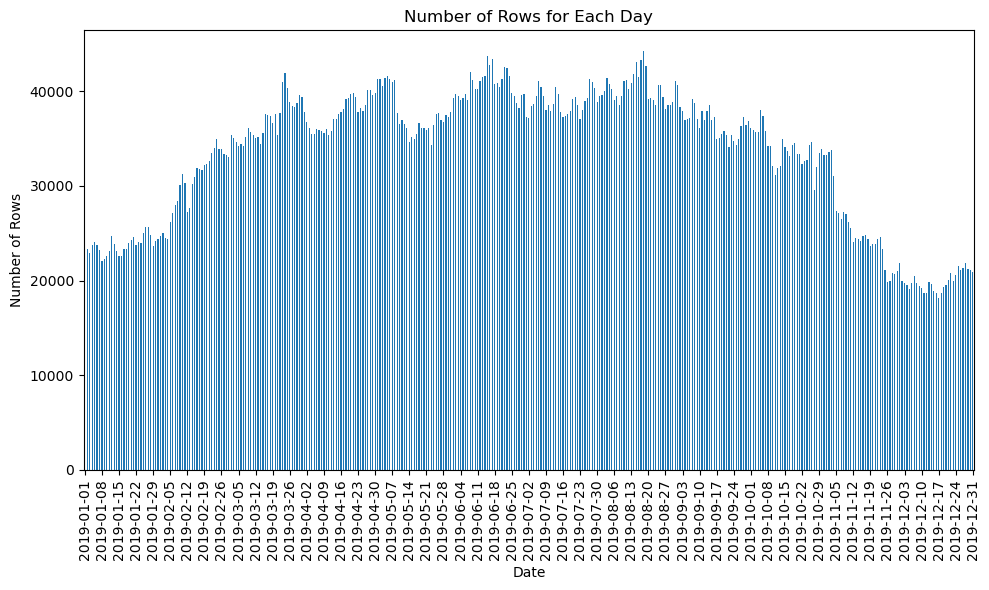

In [43]:
daily_counts = combined_df['local_date'].value_counts().sort_index()

# Generate custom xticks starting from the first date and then incrementing by 7 days
start_date = daily_counts.index.min()
end_date = daily_counts.index.max()
custom_xticks = pd.date_range(start=start_date, end=end_date, freq='7D')

# Plot the results
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Number of Rows for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Rows')
plt.xticks(ticks=range(len(daily_counts)), labels=daily_counts.index.strftime('%Y-%m-%d'), rotation=90)
plt.gca().set_xticks([i for i, date in enumerate(daily_counts.index) if date in custom_xticks])
plt.tight_layout()
plt.show()

# Check Minimum and Maximum

In [44]:
max_15_counts = daily_counts.nlargest(15)
max_15_counts

2019-08-18    44201
2019-06-15    43692
2019-06-17    43379
2019-08-17    43264
2019-08-15    43040
2019-06-16    42735
2019-08-19    42637
2019-06-22    42533
2019-06-23    42396
2019-06-08    41987
2019-03-24    41871
2019-08-14    41815
2019-05-05    41615
2019-06-24    41615
2019-06-14    41590
Name: local_date, dtype: int64

In [45]:
min_5_counts = daily_counts.nsmallest(15)
min_5_counts

2019-12-17    18149
2019-12-16    18636
2019-12-18    18636
2019-12-12    18710
2019-12-11    18731
2019-12-15    18889
2019-12-05    19129
2019-12-10    19240
2019-12-19    19350
2019-12-09    19409
2019-12-20    19508
2019-12-04    19519
2019-12-14    19630
2019-12-08    19697
2019-12-03    19708
Name: local_date, dtype: int64

# Export

In [46]:
# Clean up
combined_df['local_date'] = combined_df['local_date'].dt.strftime('%Y%m%d').astype(int)
combined_df = combined_df.sort_values('local_date').reset_index(drop = True)
combined_df

/tmp/ipykernel_213/829992120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['local_date'] = combined_df['local_date'].dt.strftime('%Y%m%d').astype(int)


,geohash_5,no_of_points,no_of_unique_users,local_time,local_date,start_hour
0,t9zvr,126,26,20190101 21:00:00 - 24:00:00,20190101,21
1,te7gy,76,18,20190101 18:00:00 - 21:00:00,20190101,18
2,te7gz,298,53,20190101 18:00:00 - 21:00:00,20190101,18
3,te7u0,1272,124,20190101 18:00:00 - 21:00:00,20190101,18
4,te7u1,8869,918,20190101 18:00:00 - 21:00:00,20190101,18
...,...,...,...,...,...,...
12214674,ttpk9,155,22,20191231 12:00:00 - 15:00:00,20191231,12
12214675,ttpkb,1327,147,20191231 12:00:00 - 15:00:00,20191231,12
12214676,ttpkc,130,23,20191231 12:00:00 - 15:00:00,20191231,12
12214677,tszhq,100,12,20191231 12:00:00 - 15:00:00,20191231,12


In [17]:
# Save the combined DataFrame to a new CSV file
folder_path = '/home/jovyan/Data/pd3/Origin/'
combined_df.to_csv(folder_path + 'pd_in_2019_agg3_3h.csv', index=False)